# Wprowadzenie do pracy w Google Colab
Google Colab bazuje na Jupyter Notebook.

**Aby uruchomić kod kliknij we fragment kodu i wciśnij Ctrl+Enter**
## Import pakietów
Punktem wyjścia do prac będa pakiety numpy, pandas i csv umozliwiajace kolejno: wygodne obliczenia i operacje na wektorach, reprezenacje i wizualizację dużych porcji danych, wczytywanie danych treningowych z formatu CSV.
Oprócz tego w przypadku korzystania z Google Colab koniecznym będze import modułów pozwalajacych na upload plików z danymi treningowymi na serwer.

In [2]:
import pandas as pd
import numpy as np
import csv
from google.colab import files
import io

# Zadania
## Wczytaj plik z danymi, który znajduje się tutaj: [House sales - real dataset]('https://szymon.bobek.re/kc_house_data_moreal_full.csv')

**Zwróć uwagę, że niektórych danych brakuje** Nie są to jednak typowe dla Pandas i Numpy `np.NaN`. Plik znajduje sie również pod adresem: `https://szymon.bobek.re/kc_house_data_moreal_full.csv`

Zastąp brakujące wartości wartośćią `np.NaN`


In [5]:
df = pd.read_csv('https://szymon.bobek.re/kc_house_data_moreal_full.csv', sep=";")
df.set_index('id')
df
df.replace('?', np.nan, inplace=True)

## Brakujące wartości
Zwizualizuj elementy brakujące wykorzystując heatmap z pakietu
seaborn
``` python
import seaborn as sns
```

<Axes: >

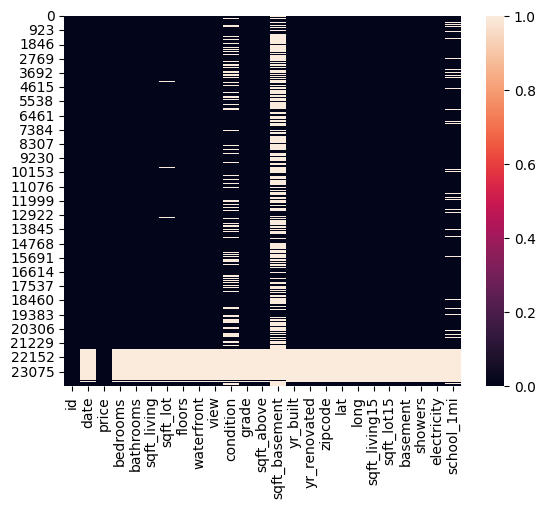

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = plt.axes()
sns.heatmap(df.isna())

## Na podstawie wyników zdecyduj co zrobić z brakujacymi elementami:
  1. Usunąć rekordy z brakujacymi danymi
  2. Uzupełnić je średnią, mediana, lub dominantą
  3. Zastosować coś bardziej fancy, np. [Imputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement,showers,electricity,school_1mi


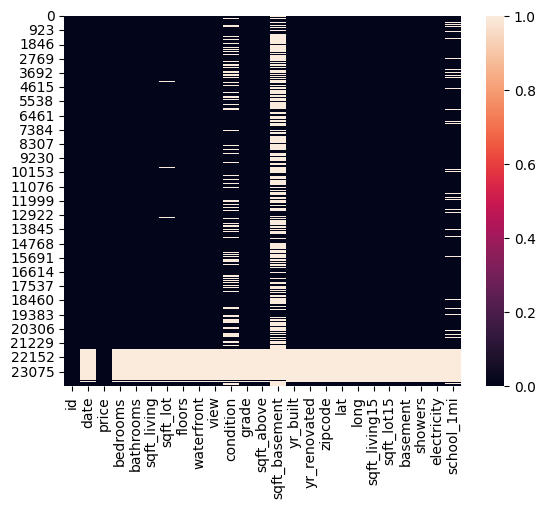

In [6]:
sns.heatmap(df.isna())
pd.set_option("display.max_rows", None, "display.max_columns", None)
df.loc[(df['id'] > 21229 ) & (df['id'] < 23774) & (df['grade'] == 'NaN')]

## Wyświetl zalezność pomiędzy powierzchnią domu a ceną domu wykorzystując  
  - [DataFrame.plot.scatter](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.scatter.html)
  - [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) z pakietu seaborn

W dalszej częsci wybieraj dogodną dla siebie formę plottowania (albo seaborn albo matplotlib)

## Zobrazuj rozkład cen domów (użyj [DataFrame.plot.hist](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.hist.html))
Pomanipuluj parametrem *bins*. Do czego on służy? Czym histogram różni się od scatter plot? Do czego może się przydać?

## Zrób wykres typu [barplot](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html) (lub [barplot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.bar.html) dla Pandas) dla różnych kodów pocztowych (oś pozioma) i średniej ceny domów. Wyrysuj tylko 10 regionów o najwyższej średniej cen domów

## Zrób wykres typu [boxplot](https://matplotlib.org/gallery/pyplots/boxplot_demo.html) (lub [boxplot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html) dla Pandas) dla zestawu danych jak powyżej, ale wybierz 10 **losowych** zipcodów które wyrysujesz , użyj opcji notch=True. Czy widać jakąś zależność pomiędzy zipcodami a cenami domów?

## Zakoduj zmienne które nie są numeryczne z wykorzystaniem [OneHotEncodera]((https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) z scikit learn (np. state) i znormalizuj dane numeryczne z wykorzystaniem [StandardScalera](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Użyj do tego [ColumnTransformera](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html).

Zmienną nienumeryczną jest na przykład **zipcode**

## Po normalizacji oblicz macież korelacji pomiędzy parametrami numerycznymi a ceną domu i wyrysują ją przy pomocy heatmap z pakietu seaborn. Które z parametrów są najsilniej skorelowane?

## Wyrysuj lokalizację poszczególnych domów na mapie USA. Zaznacz wartość sprzedanego domu za pomocą koloru, lub rozmiaru "kropki" na mapie. Możesz wykorzystać [Plotly](https://plotly.com/python/maps/)